In [2]:
import re
import pandas as pd
import os

directory_path = r'C:\Users\smorr\Desktop\2024 Projects\130 point\\'

file_path = os.path.join(directory_path, 'rc_card.txt')

def parse_item(text):
    item = {}
    item['title'] = re.search(r'^.*?(?=\s{2,})', text, re.DOTALL).group(0)
    
    # Search for 'List Price' and its value
    list_price_match = re.search(r'List Price: (.*?)\s', text)
    item['list_price'] = list_price_match.group(1) if list_price_match else None
    
    # Search for 'Sale Price' and its value
    sale_price_match = re.search(r'Sale Price: (.*?)\s', text)
    item['sale_price'] = sale_price_match.group(1) if sale_price_match else None
    
    # Search for 'Date' and its value
    date_match = re.search(r'Date: (.*?)\s', text)
    item['date'] = date_match.group(1) if date_match else None
    
    return item

# Read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Split the text into individual items
items_text = re.split(r'eBay\n', text_data.strip())

# Parse each item and store in a list of dictionaries
items = [parse_item(item) for item in items_text if 'Best Offer' in item]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(items)

# Print the DataFrame
print(df)

                                                 title list_price sale_price  \
0                             jahmyr gibbs rookie card      10.00          7   
1                              Jordan Love Rookie Card      10.00       7.25   
2                    Victor Wembanyama Rookie Card Lot       None        825   
3                              Brock Purdy rookie card       5.00          4   
4                            Shohei Ohtani rookie card       None         25   
..                                                 ...        ...        ...   
169  2021 UFC Prizm Jamahal Hill RC Rookie Base Car...       1.49       1.25   
170                          isiah pacheco rookie card       None          3   
171  Rookie Greetings #01 Victor Wembanyama Rookie ...      50.00         40   
172                            kobe bryant rookie card     350.00        298   
173                     Bennedict Mathurin Rookie Card       1.15       0.97   

    date  
0    Sun  
1    Sat  
2    S

In [3]:
# Drop rows where 'list_price' is None
df = df.dropna(subset=['list_price'])

# Reset the index
df = df.reset_index(drop=True)

df.head()

,title,list_price,sale_price,date
0,jahmyr gibbs rookie card,10.00,7,Sun
1,Jordan Love Rookie Card,10.00,7.25,Sat
2,Brock Purdy rookie card,5.00,4,Sat
3,SHAQ ROOKIE CARD 1992-93 Topps #362 Shaquille ...,18.50,15,Thu
4,2023 Caitlin Clark Bowman Rookie Card BB-18 RA...,59.99,45,Thu


In [4]:
df_filtered = df

# Remove commas from list_price and sale_price and convert to numeric types
df_filtered['list_price'] = df_filtered['list_price'].str.replace(',', '').astype(float)
df_filtered['sale_price'] = df_filtered['sale_price'].str.replace(',', '').astype(float)

# Calculate the difference between sale_price and list_price
df_filtered['price_difference'] = df_filtered['sale_price'] - df_filtered['list_price']

# Calculate the percentage difference and round to two decimal places
df_filtered['percentage_off_sale'] = round((df_filtered['price_difference'] / df_filtered['list_price']) * 100, 2)

# Display the DataFrame with percentage difference
print(df_filtered[['title', 'list_price', 'sale_price', 'date', 'percentage_off_sale']])

                                                 title  list_price  \
0                             jahmyr gibbs rookie card       10.00   
1                              Jordan Love Rookie Card       10.00   
2                              Brock Purdy rookie card        5.00   
3    SHAQ ROOKIE CARD 1992-93 Topps #362 Shaquille ...       18.50   
4    2023 Caitlin Clark Bowman Rookie Card BB-18 RA...       59.99   
..                                                 ...         ...   
151                         ahmad garndner rookie card        5.00   
152  2021 UFC Prizm Jamahal Hill RC Rookie Base Car...        1.49   
153  Rookie Greetings #01 Victor Wembanyama Rookie ...       50.00   
154                            kobe bryant rookie card      350.00   
155                     Bennedict Mathurin Rookie Card        1.15   

     sale_price date  percentage_off_sale  
0          7.00  Sun               -30.00  
1          7.25  Sat               -27.50  
2          4.00  Sat       

In [5]:
# Calculate the average percentage off sale
average_percentage_off_sale = df_filtered['percentage_off_sale'].mean()

# Print the average percentage off sale
print("Average Percentage Off Sale:", average_percentage_off_sale)


Average Percentage Off Sale: -24.77858974358974


In [8]:
# Convert 'date' column to a categorical type with specified order
df_filtered['date'] = pd.Categorical(df_filtered['date'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

# Calculate the average percentage off sale for each date and sort by date
average_percentage_off_sale_by_date = df_filtered.groupby('date')['percentage_off_sale'].mean().sort_index()

# Print the average percentage off sale for each date
print("Average Percentage Off Sale by Date:", average_percentage_off_sale_by_date)

Average Percentage Off Sale by Date: date
Mon   -27.411333
Tue   -27.261667
Wed   -22.763704
Thu   -24.843750
Fri   -24.627778
Sat   -24.630714
Sun   -21.438421
Name: percentage_off_sale, dtype: float64


In [9]:
directory_path = r'C:\Users\smorr\Desktop\2024 Projects\130 point\\'

file_path = os.path.join(directory_path, 'rc_sticker.txt')

def parse_item(text):
    item = {}
    item['title'] = re.search(r'^.*?(?=\s{2,})', text, re.DOTALL).group(0)
    
    # Search for 'List Price' and its value
    list_price_match = re.search(r'List Price: (.*?)\s', text)
    item['list_price'] = list_price_match.group(1) if list_price_match else None
    
    # Search for 'Sale Price' and its value
    sale_price_match = re.search(r'Sale Price: (.*?)\s', text)
    item['sale_price'] = sale_price_match.group(1) if sale_price_match else None
    
    # Search for 'Date' and its value
    date_match = re.search(r'Date: (.*?)\s', text)
    item['date'] = date_match.group(1) if date_match else None
    
    return item

# Read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Split the text into individual items
items_text = re.split(r'eBay\n', text_data.strip())

# Parse each item and store in a list of dictionaries
items = [parse_item(item) for item in items_text if 'Best Offer' in item]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(items)

# Print the DataFrame
print(df)

                                                 title list_price sale_price  \
0    2023-24 Panini Sticker Collection Victor Wemba...       None         22   
1    MICHAEL JORDAN PSA 8 1986 FLEER STICKER #8 ROO...   1,250.00       1099   
2    2023-24 Victor Wembanyama 10 Rookie Card Lot H...     110.00        100   
3    1986 Fleer Basketball Sticker #6 Patrick Ewing...      45.00         39   
4    VICTOR WEMBANYAMA ROOKIE Sneaker Stars 2023-24...      15.99         10   
..                                                 ...        ...        ...   
256  Valentin Barco Rookie RC Sticker Boca Junior P...       6.00          5   
257  2023- 24 PANINI ROOKIE STICKER VICTOR WEMBANYA...      29.99      19.99   
258  1997 WWF WWE Panini Superstars The Rock Rookie...      45.00         36   
259  2019 Panini Tabloid Premier League Bukayo Saka...      40.00         30   
260  1986-87 Super Canasta Michael Jordan Rookie St...     100.00         45   

    date  
0    Sun  
1    Sun  
2    S

In [10]:
# Drop rows where 'list_price' is None
df = df.dropna(subset=['list_price'])

# Reset the index
df = df.reset_index(drop=True)

df.head()

,title,list_price,sale_price,date
0,MICHAEL JORDAN PSA 8 1986 FLEER STICKER #8 ROO...,"1,250.00",1099,Sun
1,2023-24 Victor Wembanyama 10 Rookie Card Lot H...,110.00,100,Sun
2,1986 Fleer Basketball Sticker #6 Patrick Ewing...,45.00,39,Sat
3,VICTOR WEMBANYAMA ROOKIE Sneaker Stars 2023-24...,15.99,10,Sat
4,2022-23 Alejandro Garnacho Panini Premier Leag...,24.99,20,Sat


In [11]:
df_filtered = df

# Remove commas from list_price and sale_price and convert to numeric types
df_filtered['list_price'] = df_filtered['list_price'].str.replace(',', '').astype(float)
df_filtered['sale_price'] = df_filtered['sale_price'].str.replace(',', '').astype(float)

# Calculate the difference between sale_price and list_price
df_filtered['price_difference'] = df_filtered['sale_price'] - df_filtered['list_price']

# Calculate the percentage difference and round to two decimal places
df_filtered['percentage_off_sale'] = round((df_filtered['price_difference'] / df_filtered['list_price']) * 100, 2)

# Display the DataFrame with percentage difference
print(df_filtered[['title', 'list_price', 'sale_price', 'date', 'percentage_off_sale']])

                                                 title  list_price  \
0    MICHAEL JORDAN PSA 8 1986 FLEER STICKER #8 ROO...     1250.00   
1    2023-24 Victor Wembanyama 10 Rookie Card Lot H...      110.00   
2    1986 Fleer Basketball Sticker #6 Patrick Ewing...       45.00   
3    VICTOR WEMBANYAMA ROOKIE Sneaker Stars 2023-24...       15.99   
4    2022-23 Alejandro Garnacho Panini Premier Leag...       24.99   
..                                                 ...         ...   
245  Valentin Barco Rookie RC Sticker Boca Junior P...        6.00   
246  2023- 24 PANINI ROOKIE STICKER VICTOR WEMBANYA...       29.99   
247  1997 WWF WWE Panini Superstars The Rock Rookie...       45.00   
248  2019 Panini Tabloid Premier League Bukayo Saka...       40.00   
249  1986-87 Super Canasta Michael Jordan Rookie St...      100.00   

     sale_price date  percentage_off_sale  
0       1099.00  Sun               -12.08  
1        100.00  Sun                -9.09  
2         39.00  Sat       

In [12]:
# Calculate the average percentage off sale
average_percentage_off_sale = df_filtered['percentage_off_sale'].mean()

# Print the average percentage off sale
print("Average Percentage Off Sale:", average_percentage_off_sale)

Average Percentage Off Sale: -24.544160000000005


In [13]:
# Convert 'date' column to a categorical type with specified order
df_filtered['date'] = pd.Categorical(df_filtered['date'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

# Calculate the average percentage off sale for each date and sort by date
average_percentage_off_sale_by_date = df_filtered.groupby('date')['percentage_off_sale'].mean().sort_index()

# Print the average percentage off sale for each date
print("Average Percentage Off Sale by Date:", average_percentage_off_sale_by_date)

Average Percentage Off Sale by Date: date
Mon   -24.617045
Tue   -24.880833
Wed   -20.478667
Thu   -27.379310
Fri   -24.505455
Sat   -24.015778
Sun   -26.043333
Name: percentage_off_sale, dtype: float64


In [14]:
directory_path = r'C:\Users\smorr\Desktop\2024 Projects\130 point\\'

file_path = os.path.join(directory_path, 'rc_all.txt')

def parse_item(text):
    item = {}
    item['title'] = re.search(r'^.*?(?=\s{2,})', text, re.DOTALL).group(0)
    
    # Search for 'List Price' and its value
    list_price_match = re.search(r'List Price: (.*?)\s', text)
    item['list_price'] = list_price_match.group(1) if list_price_match else None
    
    # Search for 'Sale Price' and its value
    sale_price_match = re.search(r'Sale Price: (.*?)\s', text)
    item['sale_price'] = sale_price_match.group(1) if sale_price_match else None
    
    # Search for 'Date' and its value
    date_match = re.search(r'Date: (.*?)\s', text)
    item['date'] = date_match.group(1) if date_match else None
    
    return item

# Read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Split the text into individual items
items_text = re.split(r'eBay\n', text_data.strip())

# Parse each item and store in a list of dictionaries
items = [parse_item(item) for item in items_text if 'Best Offer' in item]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(items)

# Print the DataFrame
print(df)

                                                 title list_price sale_price  \
0    2023-24 Panini Sticker Collection Victor Wemba...       None         22   
1    MICHAEL JORDAN PSA 8 1986 FLEER STICKER #8 ROO...   1,250.00       1099   
2    2023-24 Victor Wembanyama 10 Rookie Card Lot H...     110.00        100   
3    1986 Fleer Basketball Sticker #6 Patrick Ewing...      45.00         39   
4    VICTOR WEMBANYAMA ROOKIE Sneaker Stars 2023-24...      15.99         10   
..                                                 ...        ...        ...   
430  2021 UFC Prizm Jamahal Hill RC Rookie Base Car...       1.49       1.25   
431                          isiah pacheco rookie card       None          3   
432  Rookie Greetings #01 Victor Wembanyama Rookie ...      50.00         40   
433                            kobe bryant rookie card     350.00        298   
434                     Bennedict Mathurin Rookie Card       1.15       0.97   

    date  
0    Sun  
1    Sun  
2    S

In [15]:
# Drop rows where 'list_price' is None
df = df.dropna(subset=['list_price'])

# Reset the index
df = df.reset_index(drop=True)

df.head()

,title,list_price,sale_price,date
0,MICHAEL JORDAN PSA 8 1986 FLEER STICKER #8 ROO...,"1,250.00",1099,Sun
1,2023-24 Victor Wembanyama 10 Rookie Card Lot H...,110.00,100,Sun
2,1986 Fleer Basketball Sticker #6 Patrick Ewing...,45.00,39,Sat
3,VICTOR WEMBANYAMA ROOKIE Sneaker Stars 2023-24...,15.99,10,Sat
4,2022-23 Alejandro Garnacho Panini Premier Leag...,24.99,20,Sat


In [16]:
df_filtered = df

# Remove commas from list_price and sale_price and convert to numeric types
df_filtered['list_price'] = df_filtered['list_price'].str.replace(',', '').astype(float)
df_filtered['sale_price'] = df_filtered['sale_price'].str.replace(',', '').astype(float)

# Calculate the difference between sale_price and list_price
df_filtered['price_difference'] = df_filtered['sale_price'] - df_filtered['list_price']

# Calculate the percentage difference and round to two decimal places
df_filtered['percentage_off_sale'] = round((df_filtered['price_difference'] / df_filtered['list_price']) * 100, 2)

# Display the DataFrame with percentage difference
print(df_filtered[['title', 'list_price', 'sale_price', 'date', 'percentage_off_sale']])

                                                 title  list_price  \
0    MICHAEL JORDAN PSA 8 1986 FLEER STICKER #8 ROO...     1250.00   
1    2023-24 Victor Wembanyama 10 Rookie Card Lot H...      110.00   
2    1986 Fleer Basketball Sticker #6 Patrick Ewing...       45.00   
3    VICTOR WEMBANYAMA ROOKIE Sneaker Stars 2023-24...       15.99   
4    2022-23 Alejandro Garnacho Panini Premier Leag...       24.99   
..                                                 ...         ...   
401                         ahmad garndner rookie card        5.00   
402  2021 UFC Prizm Jamahal Hill RC Rookie Base Car...        1.49   
403  Rookie Greetings #01 Victor Wembanyama Rookie ...       50.00   
404                            kobe bryant rookie card      350.00   
405                     Bennedict Mathurin Rookie Card        1.15   

     sale_price date  percentage_off_sale  
0       1099.00  Sun               -12.08  
1        100.00  Sun                -9.09  
2         39.00  Sat       

In [17]:
# Calculate the average percentage off sale
average_percentage_off_sale = df_filtered['percentage_off_sale'].mean()

# Print the average percentage off sale
print("Average Percentage Off Sale:", average_percentage_off_sale)

Average Percentage Off Sale: -24.63423645320197


In [18]:
# Convert 'date' column to a categorical type with specified order
df_filtered['date'] = pd.Categorical(df_filtered['date'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

# Calculate the average percentage off sale for each date and sort by date
average_percentage_off_sale_by_date = df_filtered.groupby('date')['percentage_off_sale'].mean().sort_index()

# Print the average percentage off sale for each date
print("Average Percentage Off Sale by Date:", average_percentage_off_sale_by_date)

Average Percentage Off Sale by Date: date
Mon   -25.749865
Tue   -25.674444
Wed   -21.561053
Thu   -26.477778
Fri   -24.548627
Sat   -24.251644
Sun   -24.360769
Name: percentage_off_sale, dtype: float64


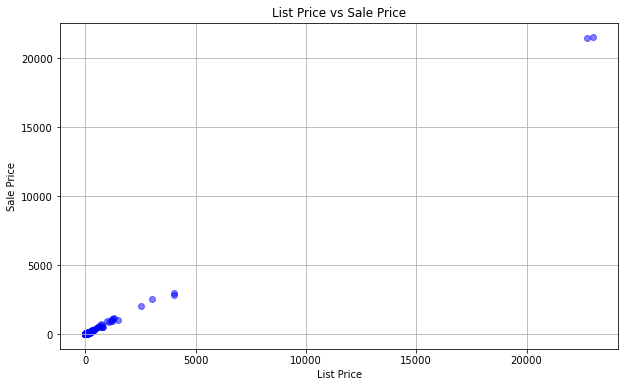

In [19]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['list_price'], df_filtered['sale_price'], color='blue', alpha=0.5)
plt.title('List Price vs Sale Price')
plt.xlabel('List Price')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()


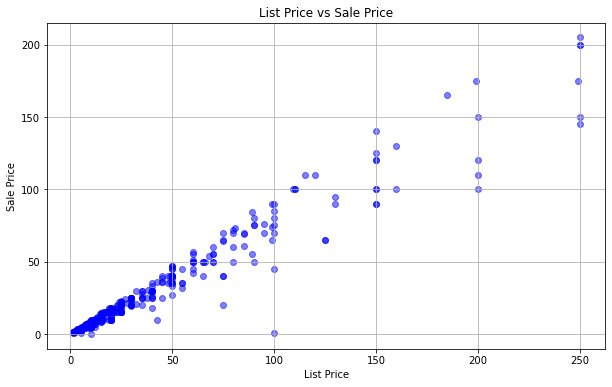

In [24]:

# Filter out rows with sale price above 20000
filtered_df = df_filtered[(df_filtered['sale_price'] <= 250) & (df_filtered['list_price'] <= 250)]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['list_price'], filtered_df['sale_price'], color='blue', alpha=0.5)
plt.title('List Price vs Sale Price')
plt.xlabel('List Price')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()


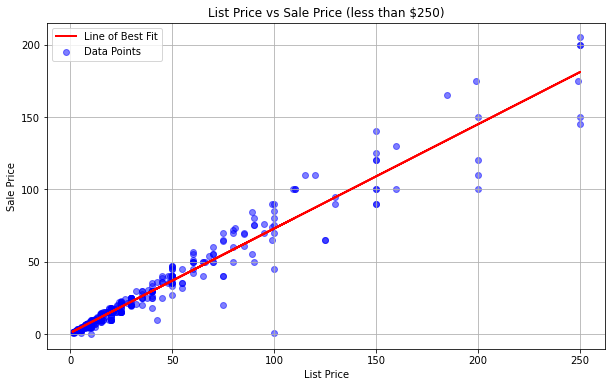

In [27]:
import numpy as np

# Filter out rows with sale price and list price less than or equal to 250
filtered_df = df_filtered[(df_filtered['sale_price'] <= 250) & (df_filtered['list_price'] <= 250)]

# Fit a linear regression model
coefficients = np.polyfit(filtered_df['list_price'], filtered_df['sale_price'], 1)
line_of_best_fit = np.polyval(coefficients, filtered_df['list_price'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['list_price'], filtered_df['sale_price'], color='blue', alpha=0.5, label='Data Points')
plt.plot(filtered_df['list_price'], line_of_best_fit, color='red', linewidth=2, label='Line of Best Fit')
plt.title('List Price vs Sale Price (less than $250)')
plt.xlabel('List Price')
plt.ylabel('Sale Price')
plt.legend()
plt.grid(True)
plt.show()


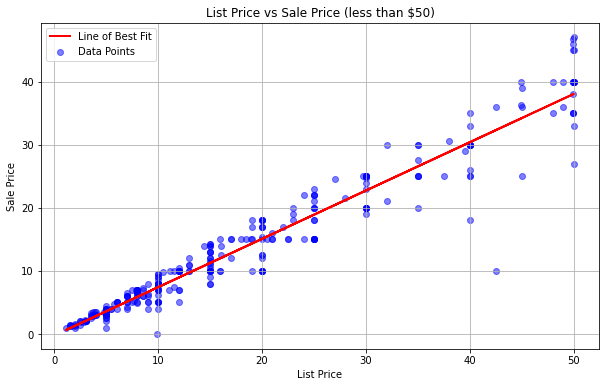

In [28]:
# Filter out rows with sale price and list price less than or equal to 250
filtered_df = df_filtered[(df_filtered['sale_price'] <= 50) & (df_filtered['list_price'] <= 50)]

# Fit a linear regression model
coefficients = np.polyfit(filtered_df['list_price'], filtered_df['sale_price'], 1)
line_of_best_fit = np.polyval(coefficients, filtered_df['list_price'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['list_price'], filtered_df['sale_price'], color='blue', alpha=0.5, label='Data Points')
plt.plot(filtered_df['list_price'], line_of_best_fit, color='red', linewidth=2, label='Line of Best Fit')
plt.title('List Price vs Sale Price (less than $50)')
plt.xlabel('List Price')
plt.ylabel('Sale Price')
plt.legend()
plt.grid(True)
plt.show()